In [1]:
!pip install emnist

In [2]:
#Load up EMNIST database and local one
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from emnist import list_datasets

In [3]:
from emnist import extract_training_samples
emnist_images, emnist_labels = extract_training_samples('letters')

In [4]:
!git clone https://github.com/SFNGGL/Progetto-AI-2023-Unipg.git --branch fix-struct

Cloning into 'Progetto-AI-2023-Unipg'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 11.24 MiB | 14.51 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [5]:
#Unzip the local folder
!mkdir digital_data
!tar -xf "/content/Progetto-AI-2023-Unipg/dataset/a_set_of_fonts.tar.gz" -C /content/digital_data
#lists all filenames onto a file
!cd digital_data/ && ls > /content/all_fonts.txt

In [6]:
bgty=[2,7,20,25]
bgty_indices=[]
lookup = { '2':1, '7':3, '20':0, '25':2 }

for i in range(len(emnist_labels)):
  if emnist_labels[i] in bgty:
    bgty_indices.append(i)

bgty_images_i=[]
bgty_labels_i=[]

for p in range(len(bgty_indices)):
  bgty_images_i.append(emnist_images[bgty_indices[p]])
  bgty_labels_i.append(lookup[str(emnist_labels[bgty_indices[p]])])

In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow

#Read the lists of names to open corresponding images and save corresponding labels
#onto the corresponding array

path = "/content/digital_data/" #[0-22]

names = { 'T':0, 't':0, 'B':1, 'b':1, 'G':3, 'g':3, 'Y':2, 'y':2 }

local_images=[]
local_labels=[]

with open("/content/all_fonts.txt") as file:
  for line in file.readlines():
    filename = line.rstrip()
    imaget= cv.imread(path+filename, flags = cv.IMREAD_GRAYSCALE)
    imaget = cv.bitwise_not(imaget)
    local_images.append(imaget)
    local_labels.append(names[filename[:1]])

In [9]:
#Append the two arrays together to get the final dataset
images = np.concatenate((np.array(bgty_images_i), np.array(local_images)))

labels= np.array(bgty_labels_i + local_labels)

#Normalizing values
images= images.astype("float32")/255

In [10]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=100)
print("Training images")
print(type(X_train))
print(X_train.shape)
print("Training labels")
print(type(y_train))
print(y_train.shape)
print("Testing images")
print(type(X_val))
print(X_val.shape)
print("Testing labels")
print(type(y_val))
print(y_val.shape)

Training images
<class 'numpy.ndarray'>
(19782, 28, 28)
Training labels
<class 'numpy.ndarray'>
(19782,)
Testing images
<class 'numpy.ndarray'>
(8479, 28, 28)
Testing labels
<class 'numpy.ndarray'>
(8479,)


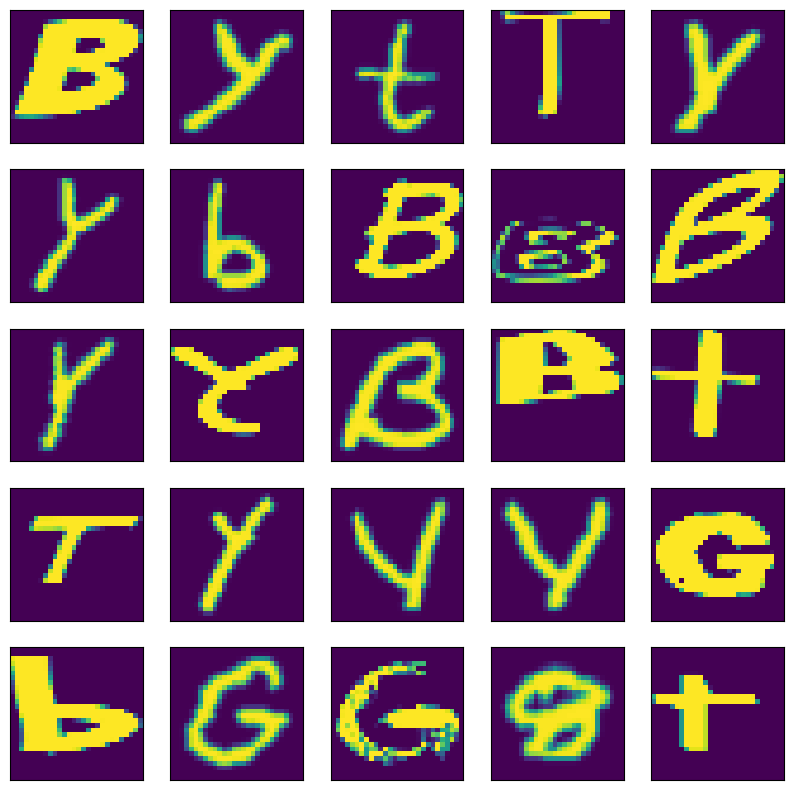

In [11]:
from random import randint
import matplotlib.pyplot as plt

t= randint(0,19781)

plt.figure(figsize=(10,10))
for i,image in enumerate(X_train[t:t+25]):
    #image = imge.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    #plt.xlabel(class_names[label])
plt.show()

In [12]:
f_v_l= 784
X_train = X_train.reshape(X_train.shape[0], f_v_l)
X_val = X_val.reshape(X_val.shape[0], f_v_l)
print(X_train.shape)
print(X_val.shape)

(19782, 784)
(8479, 784)


In [13]:
bgty_model = keras.Sequential()

bgty_model.add(layers.Dropout(
                        0.5,
                        input_shape = (f_v_l,)
))
bgty_model.add(layers.Dense(
                        1024,
                        kernel_initializer = "lecun_normal",
                        activation = "selu"
))
bgty_model.add(layers.Dense(
                        2048,
                        activation = "relu"
))
bgty_model.add(layers.Dense(
                        1024,
                        activation = "relu"
))
bgty_model.add(layers.Dense(
                        4,
                        activation = "softmax"
))

bgty_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 5005316 (19.09 MB)
Trainable params: 5005316 (19.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#Training and Evaluation

batch_size = 256
epochs = 10

bgty_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer = "adam",
                  metrics = ["accuracy"])
history = bgty_model.fit(X_train, y_train, batch_size = 256, epochs=epochs,
                         validation_data=(X_val, y_val))

Epoch 1/10
78/78 [==============================] - 24s 290ms/step - loss: 0.5467 - accuracy: 0.7972 - val_loss: 0.2242 - val_accuracy: 0.9251
Epoch 2/10
78/78 [==============================] - 18s 238ms/step - loss: 0.2614 - accuracy: 0.9058 - val_loss: 0.1855 - val_accuracy: 0.9354
Epoch 3/10
78/78 [==============================] - 18s 233ms/step - loss: 0.2179 - accuracy: 0.9208 - val_loss: 0.1733 - val_accuracy: 0.9370
Epoch 4/10
78/78 [==============================] - 22s 287ms/step - loss: 0.1924 - accuracy: 0.9317 - val_loss: 0.1487 - val_accuracy: 0.9486
Epoch 5/10
78/78 [==============================] - 19s 245ms/step - loss: 0.1672 - accuracy: 0.9403 - val_loss: 0.1206 - val_accuracy: 0.9601
Epoch 6/10
78/78 [==============================] - 19s 244ms/step - loss: 0.1446 - accuracy: 0.9493 - val_loss: 0.1320 - val_accuracy: 0.9538
Epoch 7/10
78/78 [==============================] - 19s 246ms/step - loss: 0.1324 - accuracy: 0.9517 - val_loss: 0.1299 - val_accuracy: 0.9584

In [15]:
score= bgty_model.evaluate(X_val, y_val, verbose=0)

print(f"Test loss: {score[0]}\nTest Accuracy: {score[1]}")

Test loss: 0.10996899008750916
Test Accuracy: 0.9626135230064392


1/1 [==============================] - 0s 139ms/step
[[9.8164797e-01 2.2073378e-05 1.7699767e-02 6.3013908e-04]]
0.99999994
la predizione è: 0
(28, 28)


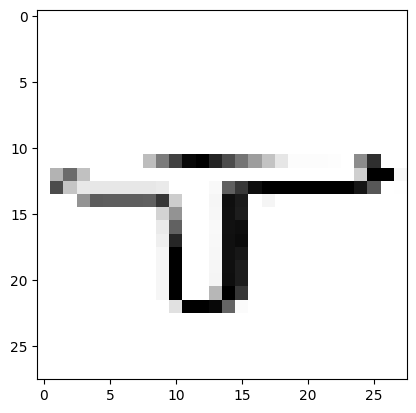

In [16]:
#Single test
import matplotlib.pyplot as plt
import random as rand

one_case=rand.randrange(0,len(X_val))

predictions_single = bgty_model.predict(X_val[one_case:(one_case + 1)])
print(predictions_single)
print(np.sum(predictions_single))
#print(X_test[one_case:(one_case + 1)])

y_classes = predictions_single.argmax()
print("la predizione è: {}".format(y_classes))

x_test_vis = X_val[one_case:(one_case+1)].reshape(28, 28)
print(x_test_vis.shape)
plt.imshow(x_test_vis, cmap = plt.cm.binary)

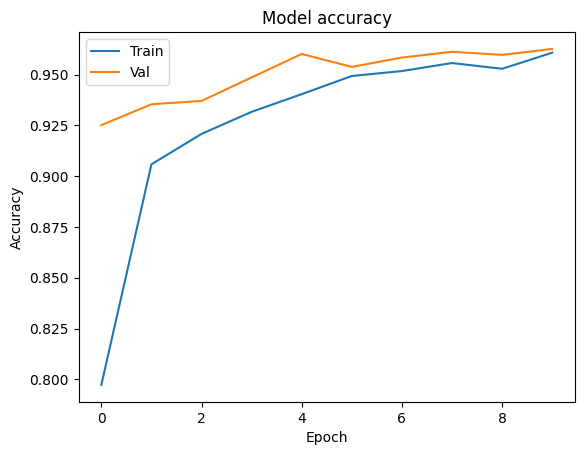

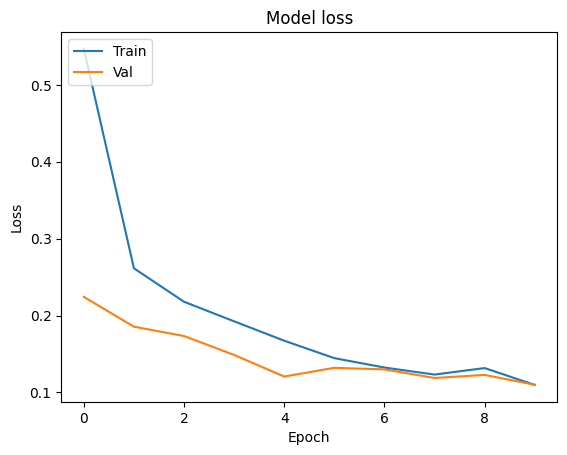

In [17]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

In [18]:
#Save model's architecture, weights, and training configuration in a single model.keras zip archive.
bgty_model.save("model.keras")

In [19]:
#Model saved download
files.download('model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>